# Multivariate Polynomial Regression

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

Import OSNIR Dataset and shuffle data

In [2]:
# import OSNIR dataset
df = pd.read_csv('../Data/OSNIR_values_extendedv3_new datasetbcsv.csv')
# shuffling rows of OSNIR dataframe and reset indexes
df = df.sample(frac=1)
df.reset_index(inplace=True, drop=True)

Divide data into\
1800 values for training (0,1800-1)\
600 values for validation (1800,2400-1)\
600 values for testing (2400,3000-1)\

In [3]:
data = np.array(df)
# input x aka Ns, Pch, L, B, GB, Nch values
x_train = data[0:1800-1, 1:7]
x_valid = data[1800:2400-1, 1:7]
x_test = data[2400:3000-1, 1:7]

# output y aka OSNIR values
y_train = data[0:1800-1, 0]
y_valid = data[1800:2400-1, 0]
y_test = data[2400:3000-1, 0]

#### Create the Decision Tree Model

In [4]:
#MPR model
model_PF = PolynomialFeatures(degree=2)
x_train_PF = model_PF.fit_transform(x_train)

#Fit Linear Model with Polynomial Features
model = LinearRegression().fit(x_train_PF,y_train)


In [5]:
OSNIR_num = data[:3000-1,0]
Input_num = model_PF.fit_transform(data[:3000-1,1:7])


In [6]:
OSNIR_est = (model.predict(Input_num))

In [7]:
for i in range(10):
    print('%s => %f (expected %f)' % (Input_num[i].tolist(), OSNIR_est[i], OSNIR_num[i] ))

[1.0, 16.0, -3.0, 50.0, 25.0, 0.0, 9.0, 256.0, -48.0, 800.0, 400.0, 0.0, 144.0, 9.0, -150.0, -75.0, -0.0, -27.0, 2500.0, 1250.0, 0.0, 450.0, 625.0, 0.0, 225.0, 0.0, 0.0, 81.0] => 20.155604 (expected 21.161046)
[1.0, 4.0, -4.0, 100.0, 25.0, 0.0, 9.0, 16.0, -16.0, 400.0, 100.0, 0.0, 36.0, 16.0, -400.0, -100.0, -0.0, -36.0, 10000.0, 2500.0, 0.0, 900.0, 625.0, 0.0, 225.0, 0.0, 0.0, 81.0] => 19.577426 (expected 18.671208)
[1.0, 12.0, -3.0, 50.0, 50.0, 0.0, 9.0, 144.0, -36.0, 600.0, 600.0, 0.0, 108.0, 9.0, -150.0, -150.0, -0.0, -27.0, 2500.0, 2500.0, 0.0, 450.0, 2500.0, 0.0, 450.0, 0.0, 0.0, 81.0] => 21.353465 (expected 21.587034)
[1.0, 32.0, -9.0, 100.0, 25.0, 0.0, 9.0, 1024.0, -288.0, 3200.0, 800.0, 0.0, 288.0, 81.0, -900.0, -225.0, -0.0, -81.0, 10000.0, 2500.0, 0.0, 900.0, 625.0, 0.0, 225.0, 0.0, 0.0, 81.0] => 4.327341 (expected 4.964594)
[1.0, 36.0, -3.0, 100.0, 25.0, 0.0, 9.0, 1296.0, -108.0, 3600.0, 900.0, 0.0, 324.0, 9.0, -300.0, -75.0, -0.0, -27.0, 10000.0, 2500.0, 0.0, 900.0, 625.0,

In [8]:
Mism = np.zeros(3000-1)
for i in range(3000-1):
    Mism[i] = OSNIR_num[i] - OSNIR_est[i]

In [9]:
pred_df = pd.DataFrame({"Actual OSNIR (dB)" : OSNIR_num.tolist(), "Predicted OSNIR (dB)" : OSNIR_est.tolist(), "Difference (dB)" : Mism.tolist()})
pred_df.to_csv("OSNIR_Prediction_MPR.csv",index=False)

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00100033, 0.00166722, 0.00133378, 0.00633545, 0.00633545,
        0.01533845, 0.02067356, 0.027009  , 0.04301434, 0.05101701,
        0.0666889 , 0.07169056, 0.0816939 , 0.07335779, 0.06568856,
        0.0816939 , 0.0816939 , 0.06402134, 0.05501834, 0.04801601,
        0.04168056, 0.03001   , 0.01700567, 0.00800267, 0.00566856,
        0.00533511, 0.00666889, 0.00400133, 0.003001  , 0.00066689,
        0.00066689, 0.00166722, 0.00133378, 0.00100033, 0.00166722]),
 array([-4. , -3.8, -3.6, -3.4, -3.2, -3. , -2.8, -2.6, -2.4, -2.2, -2. ,
        -1.8, -1.6, -1.4, -1.2, -1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,
         0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2,  2.4,
         2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ]),
 <BarContainer object of 40 artists>)

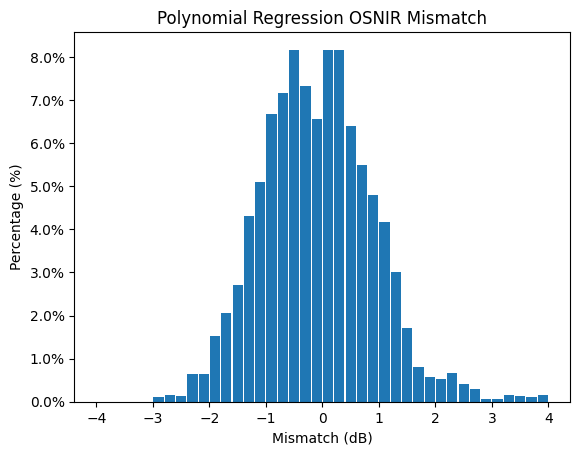

In [10]:
plt.title('Polynomial Regression OSNIR Mismatch')
plt.xlabel('Mismatch (dB)')
plt.ylabel('Percentage (%)')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.hist(Mism,
         range=(-4,4),
         rwidth=0.9,
         bins=40,
         weights=np.ones(len(Mism))/len(Mism)
         )